# Analisi SSH Crema

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

DEFAULT_FIGSIZE = (20,20)

dfs = []

dfs.append(pd.read_csv("data/UNIPD_appartamento7_AGGREG.csv"))
dfs.append(pd.read_csv("data/UNIPD_appartamento8_AGGREG.csv"))
dfs.append(pd.read_csv("data/UNIPD_appartamento9_AGGREG.csv"))
dfs.append(pd.read_csv("data/UNIPD_appartamento10_AGGREG.csv"))
dfs.append(pd.read_csv("data/UNIPD_appartamento11_AGGREG.csv"))

def prepare_df(df):
    
    df.fillna(method='bfill', inplace=True)
    df.fillna(method='ffill', inplace=True)
    df.fillna(0, inplace=True)
    df[['date','time']] = df.start_record.str.split(" ",expand=True)
    df['date'] = df['date'].str.replace("-","").astype(int)
    df['time'] = df['time'].str.replace(":","").astype(int)
    df.sort_values(by='start_record',ascending=False, inplace=True)
    return df

In [2]:
dfs = [prepare_df(df) for df in dfs]
dfs[0].head()

,start_record,end_record,MHSEASON,MHTAMB01,MHTAMB02,MHSETP01,MHSETP02,MHCNTR01,MHCNTR02,MHCNTR03,...,MAXINSFL,TAMPERCT,ORA_ALBA,ORA_TRAM,TEMP_EXT,UMID_EXT,NUVOLOSI,PRESSION,date,time
8474,2021-09-08 15:55:46,2021-09-08 15:59:52,0.0,26.1,26.0,0.0,0.0,34.80,9.0,0.0,...,0.0,0.0,1.631076e+09,1.631123e+09,27.520,31.0,0.0,1017.0,20210908,155546
8473,2021-09-08 15:50:09,2021-09-08 15:54:46,0.0,26.1,26.0,0.0,0.0,54.20,29.4,0.0,...,0.0,0.0,1.631076e+09,1.631123e+09,27.516,31.0,0.0,1017.0,20210908,155009
8472,2021-09-08 15:46:08,2021-09-08 15:49:08,0.0,26.1,26.0,0.0,0.0,34.75,9.0,0.0,...,0.0,0.0,1.631076e+09,1.631123e+09,27.510,31.0,0.0,1017.0,20210908,154608
8471,2021-09-08 15:40:54,2021-09-08 15:44:59,0.0,26.1,26.0,0.0,0.0,63.80,37.8,0.0,...,0.0,0.0,1.631076e+09,1.631123e+09,27.510,31.0,0.0,1017.0,20210908,154054
8470,2021-09-08 15:35:48,2021-09-08 15:39:53,0.0,26.1,26.0,0.0,0.0,34.80,9.0,0.0,...,0.0,0.0,1.631076e+09,1.631123e+09,27.538,31.0,0.0,1017.0,20210908,153548


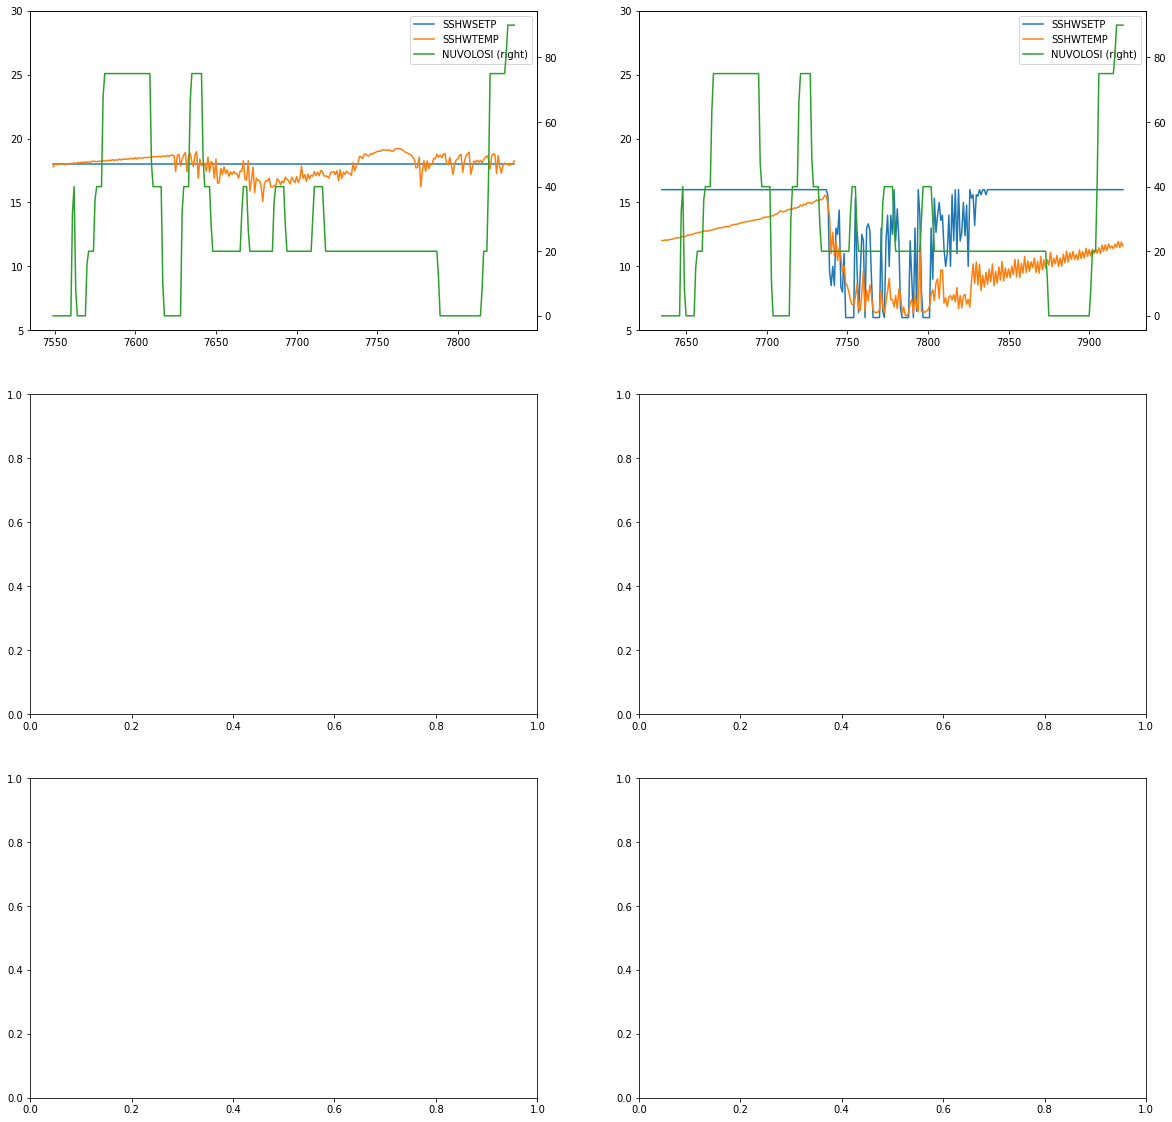

In [26]:
plot_vars = ['SSHWSETP','SSHWTEMP',]
fig, axes = plt.subplots(nrows=3, ncols=2)
row=0
col=0
for df in dfs[0:2]:
    ax = df[df['date']==20210831][plot_vars].plot(figsize=DEFAULT_FIGSIZE,ax=axes[row,col])
    ax.set_ylim(5,30)
    df[df['date']==20210831][['NUVOLOSI']].plot(figsize=DEFAULT_FIGSIZE,secondary_y=True, ax=ax)
    row=(row+col)%3
    col=(col+1)%2

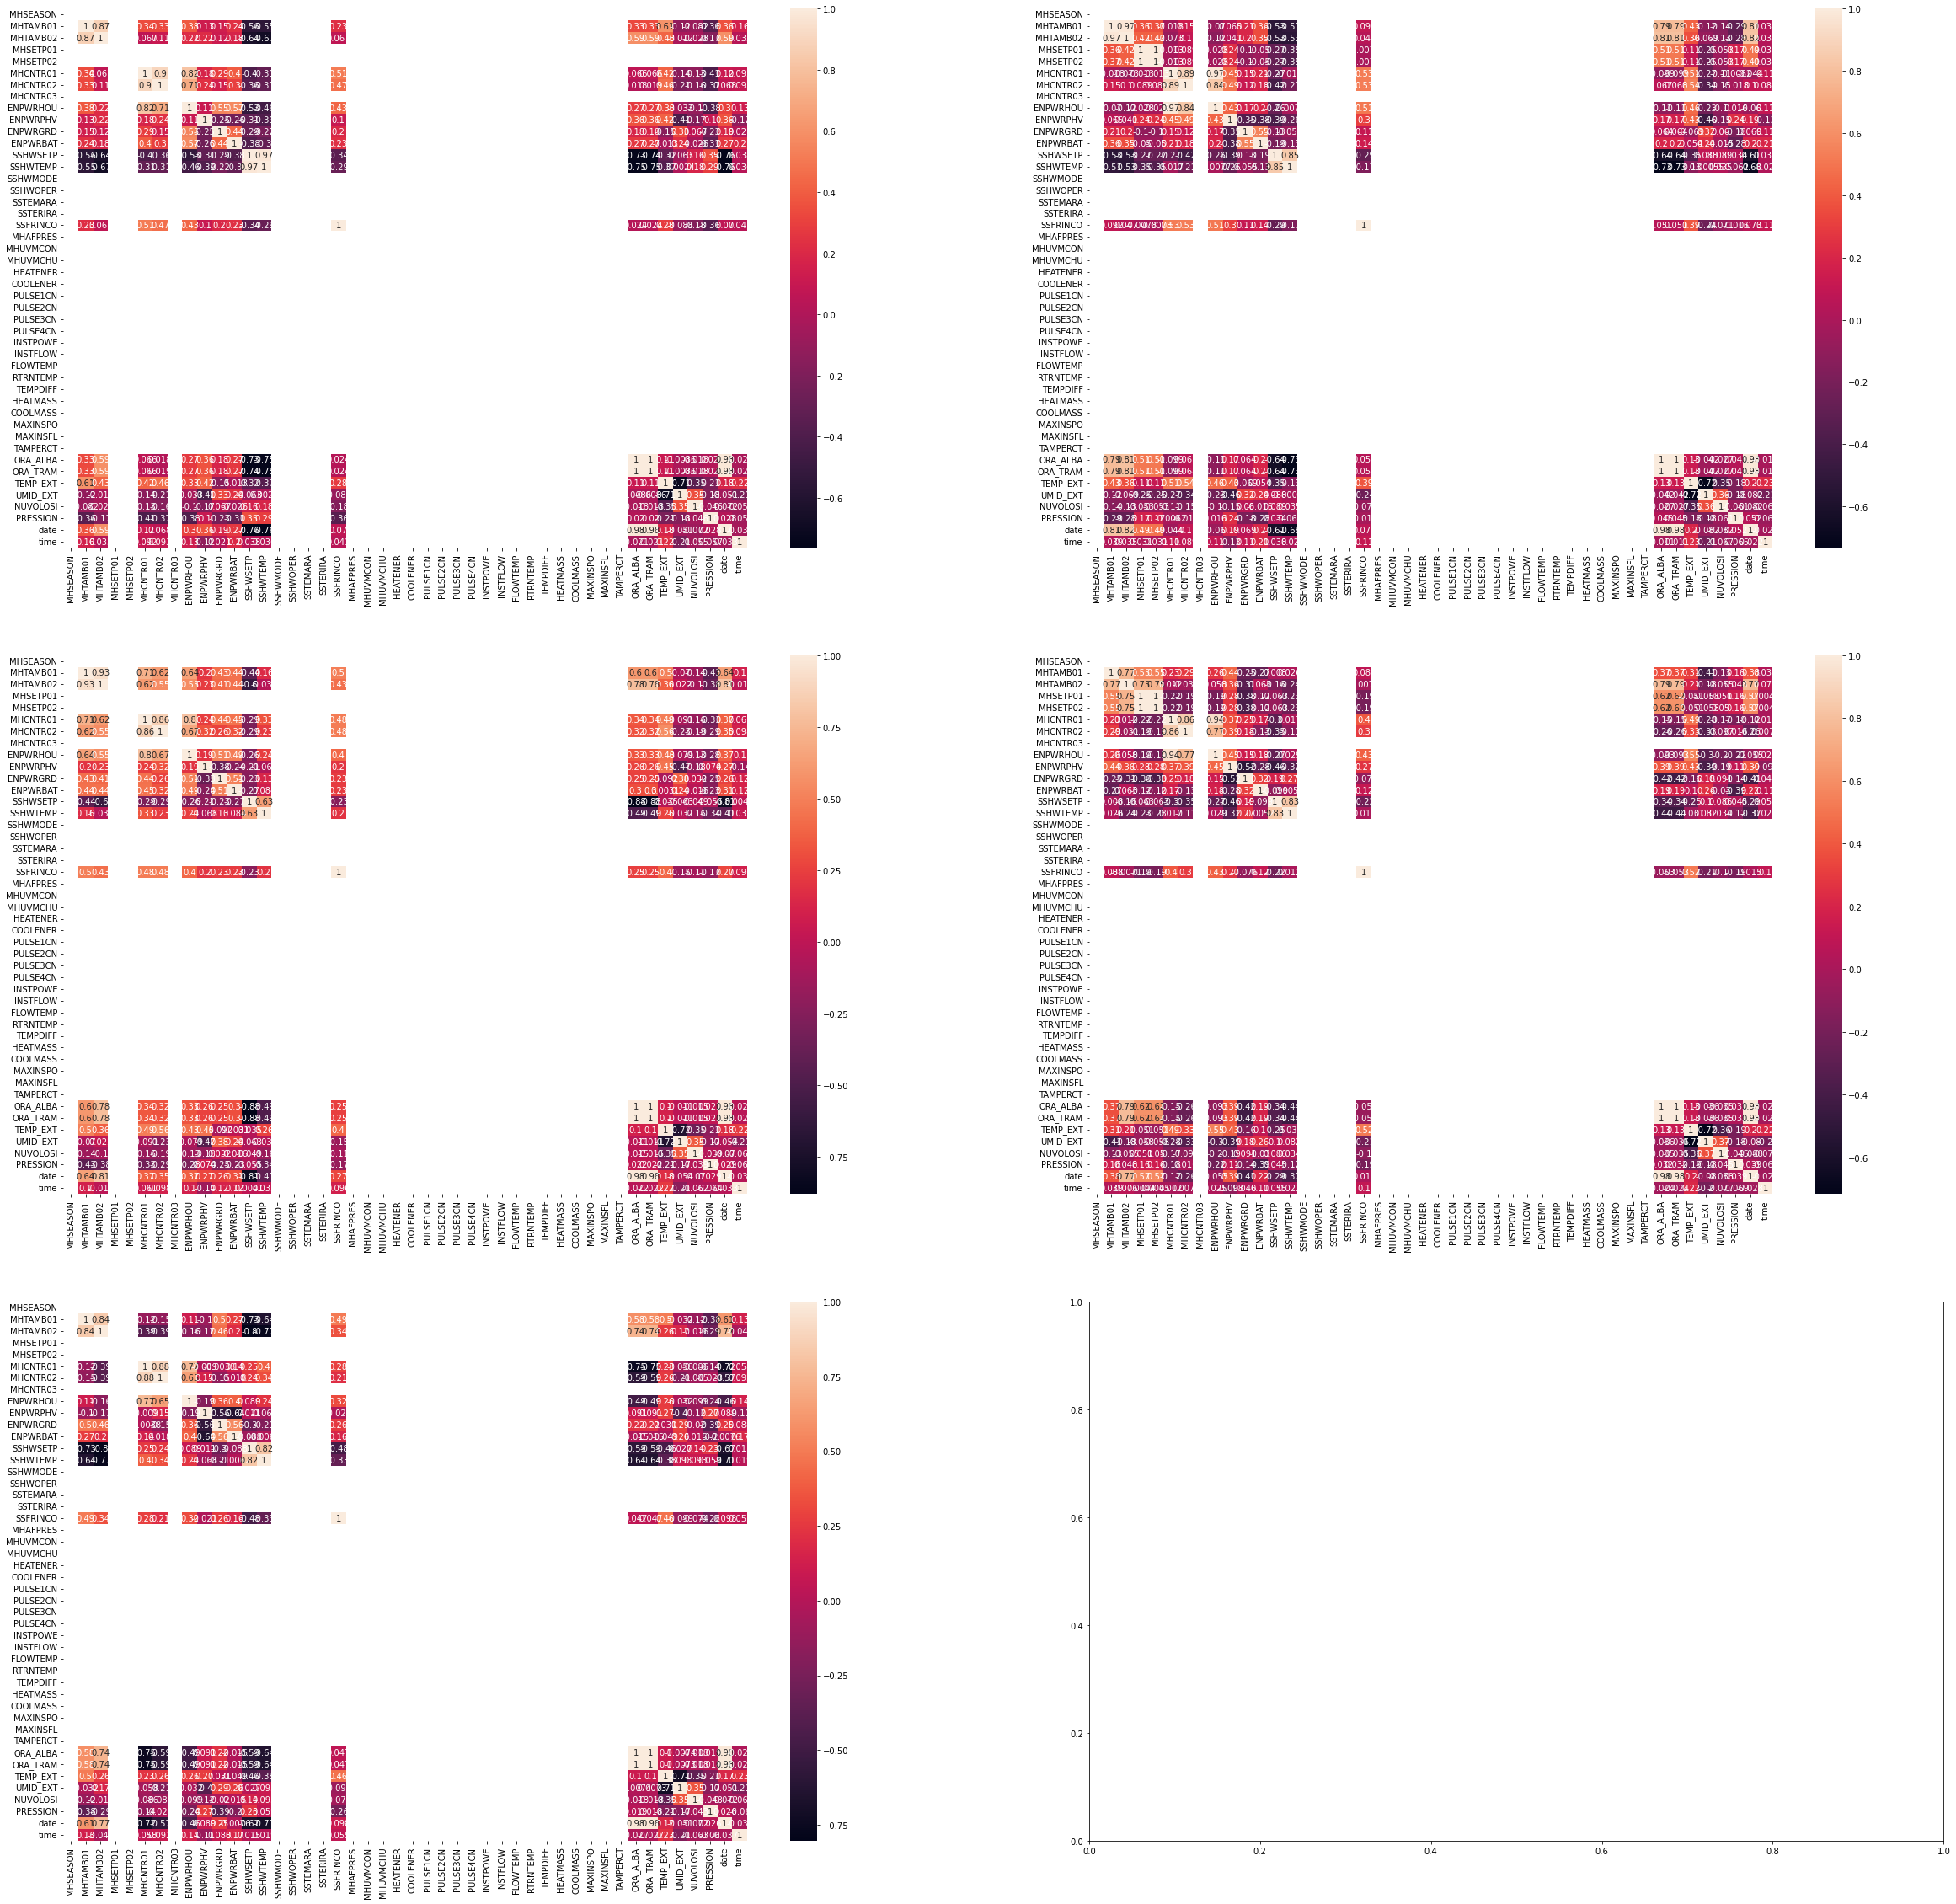

In [21]:
corrs = [df.corr() for df in dfs]
fig, axes = plt.subplots(nrows=3, ncols=2,figsize=(40,40))

row=0
col=0
for corr in corrs:
    sns.heatmap(corr, annot=True,ax=axes[row,col])
    row=(row+col)%3
    col=(col+1)%2
plt.show()

In [5]:
from sklearn.linear_model import LinearRegression
models = [LinearRegression()]*len(dfs)
columns_to_be_dropped = ["start_record","end_record",'MHSEASON',"SSHWTEMP"]
target_column = 'SSHWTEMP'

def prepare_df_to_fit(df):
    target = df[target_column]
    source = df.drop(columns=columns_to_be_dropped)  
    return (source,target)

for model,df in zip(models,dfs):
    source, target = prepare_df_to_fit(df)
    model.fit(source, target)

In [6]:
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae, r2_score as r2

for model,df in zip(models,dfs):
    source, target = prepare_df_to_fit(df)
    prevision = model.predict(source)
    print(mse(target,prevision) , mae(target,prevision) , r2(target,prevision))

36.34483527582374 4.460550359008233 -0.10121493409700388
27.05877627050114 4.568193515505611 0.009503483548884084
16.019378559787874 3.2680162809481503 -1.5225699779711772
20.184782225285264 3.2383923876280636 -0.3769723452667848
2.7385898631742744 1.2244307143838555 0.7988279683017028


In [18]:
sample = df.sample()
source, target = prepare_df_to_fit(sample)
pd.set_option('display.max_columns', None)

sample.head()

,start_record,end_record,MHSEASON,MHTAMB01,MHTAMB02,MHSETP01,MHSETP02,MHCNTR01,MHCNTR02,MHCNTR03,ENPWRHOU,ENPWRPHV,ENPWRGRD,ENPWRBAT,SSHWSETP,SSHWTEMP,SSHWMODE,SSHWOPER,SSTEMARA,SSTERIRA,SSFRINCO,MHAFPRES,MHUVMCON,MHUVMCHU,HEATENER,COOLENER,PULSE1CN,PULSE2CN,PULSE3CN,PULSE4CN,INSTPOWE,INSTFLOW,FLOWTEMP,RTRNTEMP,TEMPDIFF,HEATMASS,COOLMASS,MAXINSPO,MAXINSFL,TAMPERCT,ORA_ALBA,ORA_TRAM,TEMP_EXT,UMID_EXT,NUVOLOSI,PRESSION,date,time
6953,2021-08-26 23:55:08,2021-08-26 23:59:20,0.0,25.1,26.4,0.0,0.0,213.8,138.0,0.0,420.0,0.0,460.0,300.0,17.0,17.84,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.630038e+09,1.630087e+09,18.610001,91.0,75.0,1007.0,20210826,235508


In [19]:
source.head()

,MHTAMB01,MHTAMB02,MHSETP01,MHSETP02,MHCNTR01,MHCNTR02,MHCNTR03,ENPWRHOU,ENPWRPHV,ENPWRGRD,ENPWRBAT,SSHWSETP,SSHWMODE,SSHWOPER,SSTEMARA,SSTERIRA,SSFRINCO,MHAFPRES,MHUVMCON,MHUVMCHU,HEATENER,COOLENER,PULSE1CN,PULSE2CN,PULSE3CN,PULSE4CN,INSTPOWE,INSTFLOW,FLOWTEMP,RTRNTEMP,TEMPDIFF,HEATMASS,COOLMASS,MAXINSPO,MAXINSFL,TAMPERCT,ORA_ALBA,ORA_TRAM,TEMP_EXT,UMID_EXT,NUVOLOSI,PRESSION,date,time
6953,25.1,26.4,0.0,0.0,213.8,138.0,0.0,420.0,0.0,460.0,300.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.630038e+09,1.630087e+09,18.610001,91.0,75.0,1007.0,20210826,235508


In [17]:
model.predict(source)

array([17.4785402])

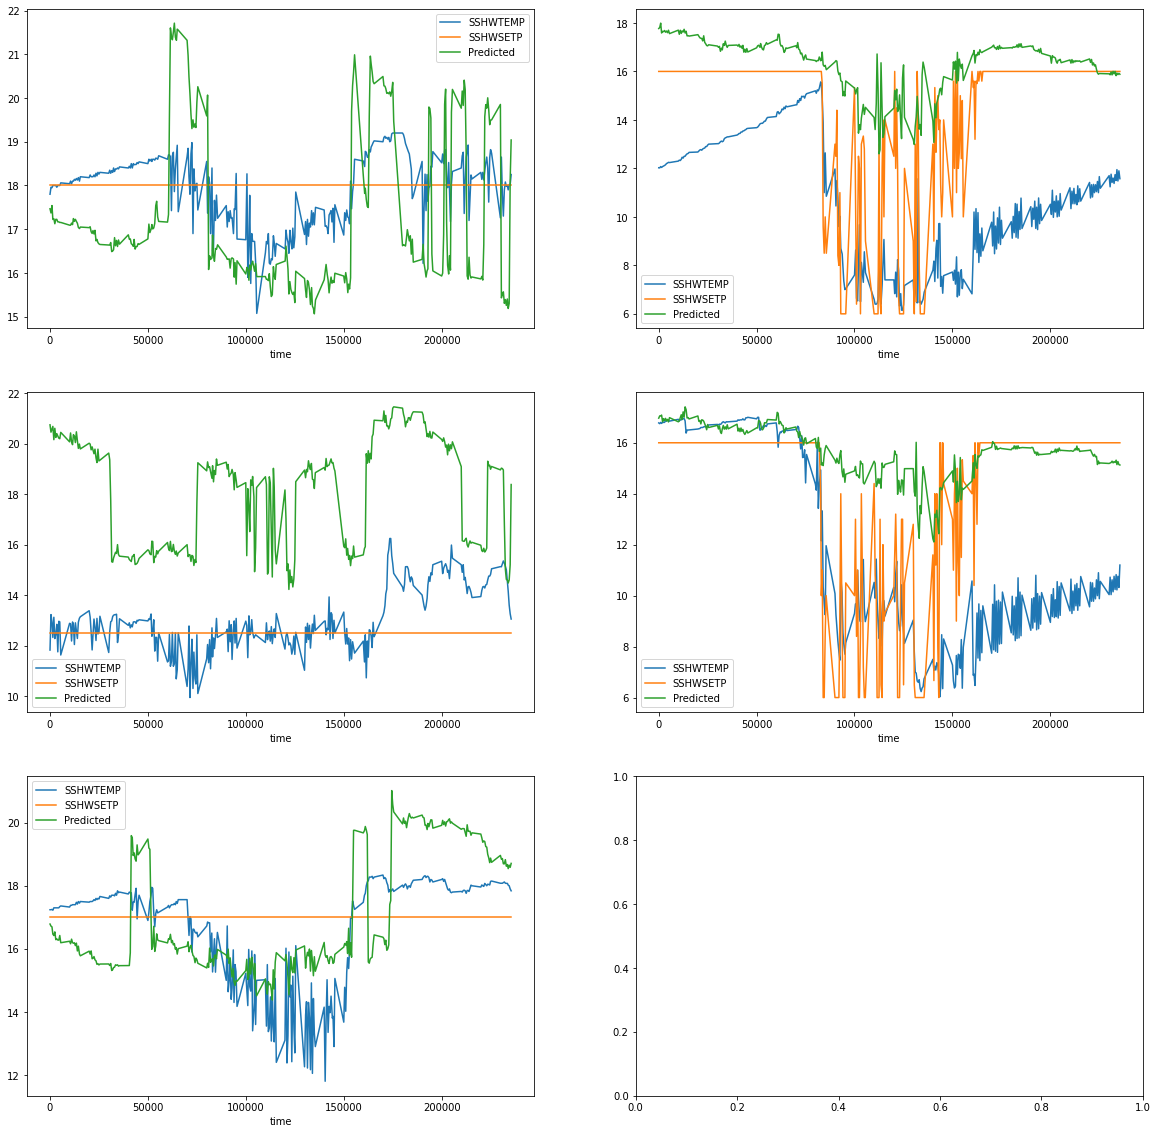

In [31]:
fig, axes = plt.subplots(nrows=3, ncols=2)
row=0
col=0

for model,df in zip(models,dfs):
    source, _ = prepare_df_to_fit(df)
    df['Predicted'] = model.predict(source)
    df[df['date']==20210831][['time','SSHWTEMP','SSHWSETP','Predicted']].plot("time",figsize=DEFAULT_FIGSIZE,ax=axes[row,col])
    row=(row+col)%3
    col=(col+1)%2
